In [1]:
import  pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#El enfoque es la diferencia entre RB y R, RB es abierta binario, R es un archivo de texto abierto
data=pd.read_pickle(r'uke_eggedal_data_challenge.pkl')
#data = np.array(data)


In [2]:
data.keys()

dict_keys(['flow', 'obs_tas', 'flow_dates', 'obs_lon_lat', 'obs_pr', 'obs_dates'])

In [3]:
# asigno cada columna a una variable para crear tablas

flow = pd.DataFrame(data['flow']) # flujo (m3 / sec) - one location - 21542 rows
obs_tas = pd.DataFrame(data['obs_tas']) # Temperature (deg C) – 9 locations - 21546 rows
flow_dates = pd.DataFrame(data['flow_dates']) # dates - 21542 rows
obs_lon_lat = pd.DataFrame(data['obs_lon_lat']) # lon and lat- one location - 2 rows
obs_pr = pd.DataFrame(data['obs_pr']) # Precipitation (mm) - 9 locations - 21546 rows
obs_dates = pd.DataFrame(data['obs_dates']) # dates - 21546 rows

Podemos ver que la variable *flow* esta directamente relacionada con la variable *flow_dates* debido a que tienen el mismo número de filas, y las variables *obs_tas*, *obs_pr* y *obs_dates* estan tambien relacionadas por tener el mismo número de filas.

Lo primero que haremos es analizar por tablas hechas de acuerdo a las relaciones que encontramos.

In [4]:
##### Creamos una tabla del Flow

# eliminamos el indice de fecha para concatenar con el flujo
flow_dates=flow_dates.reset_index()
flow_dates=flow_dates.drop(['index'], axis=1)
flow_dates=flow_dates.rename(columns={0:1})
# hacemos una sola tabla
data_flow = pd.concat([flow, flow_dates], axis=1)
data_flow = data_flow.rename(columns={0:'flow', 1:'flow_dates'})
data_flow

flow flow_dates
0      1.723781 1958-01-04
1      0.960882 1958-01-05
2      0.001000 1958-01-06
3      0.001000 1958-01-07
4      0.316796 1958-01-08
...         ...        ...
21537  4.843290 2016-12-22
21538  3.756970 2016-12-23
21539  3.556818 2016-12-24
21540  3.402133 2016-12-25
21541  1.812796 2016-12-26

[21542 rows x 2 columns]

In [5]:
#comprobamos que no haya valores nulos
data_flow.describe()

flow
count  21542.000000
mean       6.899912
std        9.621918
min        0.000031
25%        1.171874
50%        3.181420
75%        8.560671
max       85.397653

In [6]:
data_flow.notnull().describe()

flow flow_dates
count   21542      21542
unique      1          1
top      True       True
freq    21542      21542

In [7]:
data_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21542 entries, 0 to 21541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   flow        21542 non-null  float64       
 1   flow_dates  21542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.7 KB


In [7]:
# Creamos una tabla de tempraturas, precipitaciones y sus fechas

# eliminamos el indice de fecha para concatenar las columnas
obs_dates=obs_dates.reset_index()
obs_dates=obs_dates.drop(['index'], axis=1)
obs_dates=obs_dates.rename(columns={0:1})

# cambiamos los nombres de columas con sufijo del lugar
obs_tas=obs_tas.rename(columns={0:'obs_tas_1', 1:'obs_tas_2', 2:'obs_tas_3', 3:'obs_tas_4', 4:'obs_tas_5', 5:'obs_tas_6', 6:'obs_tas_7', 7:'obs_tas_8', 8:'obs_tas_9'})
obs_pr=obs_pr.rename(columns={0:'obs_pr_1', 1:'obs_pr_2', 2:'obs_pr_3', 3:'obs_pr_4', 4:'obs_pr_5', 5:'obs_pr_6', 6:'obs_pr_7', 7:'obs_pr_8', 8:'obs_pr_9'})
obs_dates=obs_dates.rename(columns={1:'obs_dates'})

# concatenamos
data_tas_pr = pd.concat([obs_tas, obs_pr, obs_dates], axis=1)
data_tas_pr

obs_tas_1  obs_tas_2  obs_tas_3  obs_tas_4  obs_tas_5  obs_tas_6  \
0     -10.600000       -9.7       -6.7  -8.800000  -8.900000  -7.500000   
1     -20.500000      -19.1      -12.0 -17.700001 -17.700001 -13.100000   
2     -23.600000      -22.5      -15.1 -21.400000 -21.400000 -16.299999   
3     -16.200001      -16.0      -14.1 -15.600000 -15.400000 -14.500000   
4      -7.900000       -7.8       -9.5  -7.600000  -7.500000  -8.000000   
...          ...        ...        ...        ...        ...        ...   
21541 -12.500000      -11.7       -8.6 -11.000000 -10.900000  -9.200000   
21542 -12.500000      -11.9       -9.1 -11.400000 -11.200000  -9.800000   
21543 -11.900000      -11.4       -8.4 -10.800000 -10.800000  -8.600000   
21544  -7.000000       -6.5       -3.4  -5.900000  -6.100000  -4.800000   
21545  -2.400000       -2.1        1.3  -1.500000  -1.800000  -0.800000   

       obs_tas_7  obs_tas_8  obs_tas_9  obs_pr_1  obs_pr_2  obs_pr_3  \
0           -8.1       -6.5       -5.4       0.0       0.0       0.0   
1          -15.5      -11.8       -9.1       0.0       0.0       0.0   
2          -19.4      -14.6      -12.2       0.1       0.0       0.3   
3          -15.0      -13.8      -11.9       1.0       0.0       1.0   
4           -7.4       -8.6       -8.2       9.3       8.6       8.0   
...          ...        ...        ...       ...       ...       ...   
21541       -9.7       -8.4       -7.5       2.2       0.1       1.1   
21542      -10.6       -8.6       -7.5       5.5       4.9       8.3   
21543       -9.3       -7.2       -6.3       1.8       1.7       2.1   
21544       -5.0       -3.8       -3.0       4.1       3.5       4.6   
21545       -0.9        0.5        1.1       6.4       7.4       8.5   

       obs_pr_4  obs_pr_5  obs_pr_6  obs_pr_7  obs_pr_8  obs_pr_9  obs_dates  
0           0.0       0.0       0.0       0.0       0.1       0.1 1957-01-01  
1           0.0       0.0       0.0       0.0       0.2       0.1 1957-01-02  
2           0.1       0.3       0.3       0.4       0.3       0.5 1957-01-03  
3           1.1       0.9       0.7       0.8       0.4       0.6 1957-01-04  
4           8.9       8.7      10.2       9.3      10.1       9.7 1957-01-05  
...         ...       ...       ...       ...       ...       ...        ...  
21541       1.5       0.1       0.0       0.0       0.0       0.0 2015-12-27  
21542       6.1       3.7       5.0       5.4       0.0       5.1 2015-12-28  
21543       2.7       0.2       0.8       2.2       0.0       0.0 2015-12-29  
21544       5.1       3.5       3.4       3.2       0.0       3.6 2015-12-30  
21545       8.4       8.4       9.8       7.9      10.0       8.1 2015-12-31  

[21546 rows x 19 columns]

In [8]:
#comprobamos que no haya valores nulos
data_tas_pr.describe()

obs_tas_1     obs_tas_2     obs_tas_3     obs_tas_4     obs_tas_5  \
count  21546.000000  21546.000000  21546.000000  21546.000000  21546.000000   
mean      -0.049341      0.711134      2.972459      1.485445      1.271053   
std        8.257276      8.392313      9.042364      8.565316      8.461657   
min      -33.799999    -32.599998    -33.299999    -33.700001    -32.799999   
25%       -5.800000     -5.200000     -3.100000     -4.400000     -4.600000   
50%        0.200000      0.900000      3.400000      1.800000      1.500000   
75%        6.600000      7.600000     10.500000      8.500000      8.200000   
max       20.299999     21.200001     23.400000     21.700001     21.700001   

          obs_tas_6     obs_tas_7     obs_tas_8     obs_tas_9      obs_pr_1  \
count  21546.000000  21546.000000  21546.000000  21546.000000  21546.000000   
mean       2.306071      1.886294      2.834048      3.518686      1.991808   
std        8.606104      8.567973      8.788865      8.951342      4.026747   
min      -32.200001    -33.200001    -32.599998    -30.799999      0.000000   
25%       -3.700000     -4.000000     -3.200000     -2.600000      0.000000   
50%        2.500000      2.200000      3.100000      3.700000      0.000000   
75%        9.500000      9.000000     10.200000     11.100000      2.500000   
max       22.700001     21.799999     23.299999     24.000000     61.500000   

           obs_pr_2      obs_pr_3      obs_pr_4      obs_pr_5      obs_pr_6  \
count  21546.000000  21546.000000  21546.000000  21546.000000  21546.000000   
mean       2.006827      2.073629      2.212420      2.265140      2.214713   
std        4.349912      4.496016      4.563929      4.757687      4.906254   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.200000      2.175000      2.600000      2.600000      2.200000   
max       60.700001     66.800003     64.000000     62.400002     61.299999   

           obs_pr_7      obs_pr_8      obs_pr_9  
count  21546.000000  21546.000000  21546.000000  
mean       2.304117      2.383965      2.257083  
std        4.804654      5.414730      5.178496  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        2.600000      2.200000      2.000000  
max       64.500000     67.699997     73.699997

In [9]:
data_tas_pr.notnull().describe()

obs_tas_1 obs_tas_2 obs_tas_3 obs_tas_4 obs_tas_5 obs_tas_6 obs_tas_7  \
count      21546     21546     21546     21546     21546     21546     21546   
unique         1         1         1         1         1         1         1   
top         True      True      True      True      True      True      True   
freq       21546     21546     21546     21546     21546     21546     21546   

       obs_tas_8 obs_tas_9 obs_pr_1 obs_pr_2 obs_pr_3 obs_pr_4 obs_pr_5  \
count      21546     21546    21546    21546    21546    21546    21546   
unique         1         1        1        1        1        1        1   
top         True      True     True     True     True     True     True   
freq       21546     21546    21546    21546    21546    21546    21546   

       obs_pr_6 obs_pr_7 obs_pr_8 obs_pr_9 obs_dates  
count     21546    21546    21546    21546     21546  
unique        1        1        1        1         1  
top        True     True     True     True      True  
freq      21546    21546    21546    21546     21546

In [10]:
data_tas_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   obs_tas_1  21546 non-null  float64       
 1   obs_tas_2  21546 non-null  float64       
 2   obs_tas_3  21546 non-null  float64       
 3   obs_tas_4  21546 non-null  float64       
 4   obs_tas_5  21546 non-null  float64       
 5   obs_tas_6  21546 non-null  float64       
 6   obs_tas_7  21546 non-null  float64       
 7   obs_tas_8  21546 non-null  float64       
 8   obs_tas_9  21546 non-null  float64       
 9   obs_pr_1   21546 non-null  float64       
 10  obs_pr_2   21546 non-null  float64       
 11  obs_pr_3   21546 non-null  float64       
 12  obs_pr_4   21546 non-null  float64       
 13  obs_pr_5   21546 non-null  float64       
 14  obs_pr_6   21546 non-null  float64       
 15  obs_pr_7   21546 non-null  float64       
 16  obs_pr_8   21546 non-null  float64      

array([[<AxesSubplot:title={'center':'obs_tas_1'}>,
        <AxesSubplot:title={'center':'obs_tas_2'}>,
        <AxesSubplot:title={'center':'obs_tas_3'}>,
        <AxesSubplot:title={'center':'obs_tas_4'}>],
       [<AxesSubplot:title={'center':'obs_tas_5'}>,
        <AxesSubplot:title={'center':'obs_tas_6'}>,
        <AxesSubplot:title={'center':'obs_tas_7'}>,
        <AxesSubplot:title={'center':'obs_tas_8'}>],
       [<AxesSubplot:title={'center':'obs_tas_9'}>,
        <AxesSubplot:title={'center':'obs_pr_1'}>,
        <AxesSubplot:title={'center':'obs_pr_2'}>,
        <AxesSubplot:title={'center':'obs_pr_3'}>],
       [<AxesSubplot:title={'center':'obs_pr_4'}>,
        <AxesSubplot:title={'center':'obs_pr_5'}>,
        <AxesSubplot:title={'center':'obs_pr_6'}>,
        <AxesSubplot:title={'center':'obs_pr_7'}>],
       [<AxesSubplot:title={'center':'obs_pr_8'}>,
        <AxesSubplot:title={'center':'obs_pr_9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

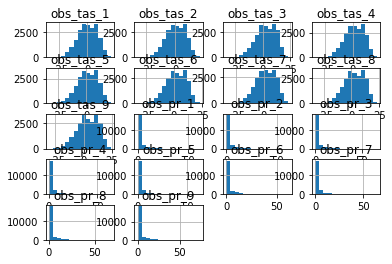

In [11]:
data_tas_pr.hist(bins=15)

### Analisis Exploratorio

Tenemos **21542** registros de datos acerca de **flujo en una sola ubicación con sus fechas**, cabe mencionar que las fechas van desde *1958-01-04* al *2016-12-26*. Mientras que, por otro lado, tenemos **21546** registros de datos acerca de las **temperaturas, precipitaciones y sus respectivas fechas en nueve ubicaciones**, en este caso las fechas empiezan el *1957-01-01* y terminan el *2015-12-31*.

Además, no hemos encontramos valores nulos, y vemos que los datos de flujo siguen una distribucion asimetrica positiva, sin outliers que sean evidentes, lo mismo sucede con los datos de precipitaciones, mientras que las temperaturaturas siguen una distribución normal entre -34 y 24 grados centigrados, con una media entre -1 y 4 grados.

Antes de continuar con el analisis exploratorio, es necesario unificar los datos de flujo y los datos de temperaturas para encontrar las posibles correlaciones, para ello, debemos separar aquellos datos que por fecha no se pueden enlazar.

In [12]:
new_data_flow=data_flow.loc[:21180] # agrupamos solo datos de nuestro interes
new_data_flow=new_data_flow.reset_index() # reseteamos index
new_data_flow=new_data_flow.drop(['index'], axis=1) # eliminamos la columna index
new_data_flow=new_data_flow.drop_duplicates() # eliminamos posibles valores duplicados
new_data_flow

flow flow_dates
0      1.723781 1958-01-04
1      0.960882 1958-01-05
2      0.001000 1958-01-06
3      0.001000 1958-01-07
4      0.316796 1958-01-08
...         ...        ...
21176  2.177040 2015-12-27
21177  4.876250 2015-12-28
21178  4.998840 2015-12-29
21179  4.428777 2015-12-30
21180  4.047925 2015-12-31

[21181 rows x 2 columns]

In [13]:
new_data_tas_pr=data_tas_pr.loc[368:] # agrupamos solo datos de nuestro interes
new_data_tas_pr=new_data_tas_pr.reset_index() # reseteamos index
new_data_tas_pr=new_data_tas_pr.drop(['index'], axis=1) # eliminamos la columna index
new_data_tas_pr=new_data_tas_pr.drop_duplicates() # eliminamos posibles valores duplicados
new_data_tas_pr

obs_tas_1  obs_tas_2  obs_tas_3  obs_tas_4  obs_tas_5  obs_tas_6  \
0          -12.8 -13.000000      -13.0      -12.5 -12.500000      -12.7   
1           -7.8  -7.900000       -8.4       -7.0  -7.300000       -8.6   
2          -11.0  -9.900000       -6.5       -8.5  -9.000000       -7.4   
3          -13.2 -12.200000       -7.9      -10.7 -11.300000       -9.8   
4          -19.9 -19.299999      -15.4      -18.4 -18.700001      -16.9   
...          ...        ...        ...        ...        ...        ...   
21173      -12.5 -11.700000       -8.6      -11.0 -10.900000       -9.2   
21174      -12.5 -11.900000       -9.1      -11.4 -11.200000       -9.8   
21175      -11.9 -11.400000       -8.4      -10.8 -10.800000       -8.6   
21176       -7.0  -6.500000       -3.4       -5.9  -6.100000       -4.8   
21177       -2.4  -2.100000        1.3       -1.5  -1.800000       -0.8   

       obs_tas_7  obs_tas_8  obs_tas_9  obs_pr_1  obs_pr_2  obs_pr_3  \
0     -12.000000      -12.5      -12.9       0.0       0.0       0.0   
1      -6.500000       -7.7       -8.3       2.0       2.2       3.0   
2      -7.900000       -6.8       -5.8      12.7      11.0      16.5   
3     -10.100000       -8.5       -7.4       6.6       6.9       9.6   
4     -17.700001      -15.9      -14.9       3.4       3.6       2.7   
...          ...        ...        ...       ...       ...       ...   
21173  -9.700000       -8.4       -7.5       2.2       0.1       1.1   
21174 -10.600000       -8.6       -7.5       5.5       4.9       8.3   
21175  -9.300000       -7.2       -6.3       1.8       1.7       2.1   
21176  -5.000000       -3.8       -3.0       4.1       3.5       4.6   
21177  -0.900000        0.5        1.1       6.4       7.4       8.5   

       obs_pr_4  obs_pr_5  obs_pr_6  obs_pr_7  obs_pr_8  obs_pr_9  obs_dates  
0           0.0       0.0       0.0       0.0       0.0       0.0 1958-01-04  
1           3.3       3.7       0.7       3.1       4.2       1.1 1958-01-05  
2          12.5      11.2      12.2      14.1      14.2      10.5 1958-01-06  
3           7.3       6.5       5.2      10.4       5.7       3.7 1958-01-07  
4           3.5       3.8       3.3       2.9       4.0       3.5 1958-01-08  
...         ...       ...       ...       ...       ...       ...        ...  
21173       1.5       0.1       0.0       0.0       0.0       0.0 2015-12-27  
21174       6.1       3.7       5.0       5.4       0.0       5.1 2015-12-28  
21175       2.7       0.2       0.8       2.2       0.0       0.0 2015-12-29  
21176       5.1       3.5       3.4       3.2       0.0       3.6 2015-12-30  
21177       8.4       8.4       9.8       7.9      10.0       8.1 2015-12-31  

[21178 rows x 19 columns]

Vemos que no podemos unir los dos dataframes dado que *difieren en el número de registros*, pero como anteriormente eliminamos los posibles valores duplicados, esto significa que **a los datos de temperaturas les hace falta tres registros**, así que debemos averiguar cuales son esos registros para eliminarlos de los datos de flujo y poder concatenar ambos dataframes.

In [14]:
#creamos una copia para eliminar los registros que no se encuentran en el segundo dataframe
flow = new_data_flow
tas_ = new_data_tas_pr

while len(flow['flow_dates']) > len(tas_['obs_dates']):
    
    iteraciones = len(tas_['obs_dates'])
    for i in range(iteraciones):
        
        if (flow['flow_dates'][i] != tas_['obs_dates'][i]):
            print("La fecha del registro", i, "no está en los datos de temperaturas y precipitaciones.")
            flow=flow.drop(i,axis=0)
            flow=flow.reset_index() # reseteamos index
            flow=flow.drop(['index'], axis=1) # eliminamos la columna index
            break

La fecha del registro 8777 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 9495 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 10723 no está en los datos de temperaturas y precipitaciones.


In [15]:
print(flow.shape)
print(tas_.shape)

(21178, 2)
(21178, 19)


In [16]:
# unimos los registros de interes
tas_.insert(0, 'flow', flow['flow'],allow_duplicates=False)
full_data=tas_
full_data

flow  obs_tas_1  obs_tas_2  obs_tas_3  obs_tas_4  obs_tas_5  \
0      1.723781      -12.8 -13.000000      -13.0      -12.5 -12.500000   
1      0.960882       -7.8  -7.900000       -8.4       -7.0  -7.300000   
2      0.001000      -11.0  -9.900000       -6.5       -8.5  -9.000000   
3      0.001000      -13.2 -12.200000       -7.9      -10.7 -11.300000   
4      0.316796      -19.9 -19.299999      -15.4      -18.4 -18.700001   
...         ...        ...        ...        ...        ...        ...   
21173  2.177040      -12.5 -11.700000       -8.6      -11.0 -10.900000   
21174  4.876250      -12.5 -11.900000       -9.1      -11.4 -11.200000   
21175  4.998840      -11.9 -11.400000       -8.4      -10.8 -10.800000   
21176  4.428777       -7.0  -6.500000       -3.4       -5.9  -6.100000   
21177  4.047925       -2.4  -2.100000        1.3       -1.5  -1.800000   

       obs_tas_6  obs_tas_7  obs_tas_8  obs_tas_9  obs_pr_1  obs_pr_2  \
0          -12.7 -12.000000      -12.5      -12.9       0.0       0.0   
1           -8.6  -6.500000       -7.7       -8.3       2.0       2.2   
2           -7.4  -7.900000       -6.8       -5.8      12.7      11.0   
3           -9.8 -10.100000       -8.5       -7.4       6.6       6.9   
4          -16.9 -17.700001      -15.9      -14.9       3.4       3.6   
...          ...        ...        ...        ...       ...       ...   
21173       -9.2  -9.700000       -8.4       -7.5       2.2       0.1   
21174       -9.8 -10.600000       -8.6       -7.5       5.5       4.9   
21175       -8.6  -9.300000       -7.2       -6.3       1.8       1.7   
21176       -4.8  -5.000000       -3.8       -3.0       4.1       3.5   
21177       -0.8  -0.900000        0.5        1.1       6.4       7.4   

       obs_pr_3  obs_pr_4  obs_pr_5  obs_pr_6  obs_pr_7  obs_pr_8  obs_pr_9  \
0           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1           3.0       3.3       3.7       0.7       3.1       4.2       1.1   
2          16.5      12.5      11.2      12.2      14.1      14.2      10.5   
3           9.6       7.3       6.5       5.2      10.4       5.7       3.7   
4           2.7       3.5       3.8       3.3       2.9       4.0       3.5   
...         ...       ...       ...       ...       ...       ...       ...   
21173       1.1       1.5       0.1       0.0       0.0       0.0       0.0   
21174       8.3       6.1       3.7       5.0       5.4       0.0       5.1   
21175       2.1       2.7       0.2       0.8       2.2       0.0       0.0   
21176       4.6       5.1       3.5       3.4       3.2       0.0       3.6   
21177       8.5       8.4       8.4       9.8       7.9      10.0       8.1   

       obs_dates  
0     1958-01-04  
1     1958-01-05  
2     1958-01-06  
3     1958-01-07  
4     1958-01-08  
...          ...  
21173 2015-12-27  
21174 2015-12-28  
21175 2015-12-29  
21176 2015-12-30  
21177 2015-12-31  

[21178 rows x 20 columns]

In [474]:
est = []
estaciones = [["invierno",'03-17'], ["primavera", '05-31'], ["verano", '09-08'], ["otoño", '12-15']]
for d  in full_data.obs_dates:
    c = False
    for es in estaciones:
        
        if not d > pd.to_datetime(str(d.year)+'-'+es[1]):
            #print(d)
            #print(pd.to_datetime(str(d.year)+'-'+es[1]))
            #print(d > pd.to_datetime(str(d.year)+'-'+es[1]))
            est.append(es[0])
            c = True
            break
    if not c:
       est.append("invierno")         

In [475]:
full_data["estacion"] = est

In [476]:
full_data

flow  obs_tas_1  obs_tas_2  obs_tas_3  obs_tas_4  obs_tas_5  \
0      1.723781      -12.8 -13.000000      -13.0      -12.5 -12.500000   
1      0.960882       -7.8  -7.900000       -8.4       -7.0  -7.300000   
2      0.001000      -11.0  -9.900000       -6.5       -8.5  -9.000000   
3      0.001000      -13.2 -12.200000       -7.9      -10.7 -11.300000   
4      0.316796      -19.9 -19.299999      -15.4      -18.4 -18.700001   
...         ...        ...        ...        ...        ...        ...   
21173  2.177040      -12.5 -11.700000       -8.6      -11.0 -10.900000   
21174  4.876250      -12.5 -11.900000       -9.1      -11.4 -11.200000   
21175  4.998840      -11.9 -11.400000       -8.4      -10.8 -10.800000   
21176  4.428777       -7.0  -6.500000       -3.4       -5.9  -6.100000   
21177  4.047925       -2.4  -2.100000        1.3       -1.5  -1.800000   

       obs_tas_6  obs_tas_7  obs_tas_8  obs_tas_9  ...  obs_pr_2  obs_pr_3  \
0          -12.7 -12.000000      -12.5      -12.9  ...       0.0       0.0   
1           -8.6  -6.500000       -7.7       -8.3  ...       2.2       3.0   
2           -7.4  -7.900000       -6.8       -5.8  ...      11.0      16.5   
3           -9.8 -10.100000       -8.5       -7.4  ...       6.9       9.6   
4          -16.9 -17.700001      -15.9      -14.9  ...       3.6       2.7   
...          ...        ...        ...        ...  ...       ...       ...   
21173       -9.2  -9.700000       -8.4       -7.5  ...       0.1       1.1   
21174       -9.8 -10.600000       -8.6       -7.5  ...       4.9       8.3   
21175       -8.6  -9.300000       -7.2       -6.3  ...       1.7       2.1   
21176       -4.8  -5.000000       -3.8       -3.0  ...       3.5       4.6   
21177       -0.8  -0.900000        0.5        1.1  ...       7.4       8.5   

       obs_pr_4  obs_pr_5  obs_pr_6  obs_pr_7  obs_pr_8  obs_pr_9  obs_dates  \
0           0.0       0.0       0.0       0.0       0.0       0.0 1958-01-04   
1           3.3       3.7       0.7       3.1       4.2       1.1 1958-01-05   
2          12.5      11.2      12.2      14.1      14.2      10.5 1958-01-06   
3           7.3       6.5       5.2      10.4       5.7       3.7 1958-01-07   
4           3.5       3.8       3.3       2.9       4.0       3.5 1958-01-08   
...         ...       ...       ...       ...       ...       ...        ...   
21173       1.5       0.1       0.0       0.0       0.0       0.0 2015-12-27   
21174       6.1       3.7       5.0       5.4       0.0       5.1 2015-12-28   
21175       2.7       0.2       0.8       2.2       0.0       0.0 2015-12-29   
21176       5.1       3.5       3.4       3.2       0.0       3.6 2015-12-30   
21177       8.4       8.4       9.8       7.9      10.0       8.1 2015-12-31   

       estacion  
0      invierno  
1      invierno  
2      invierno  
3      invierno  
4      invierno  
...         ...  
21173  invierno  
21174  invierno  
21175  invierno  
21176  invierno  
21177  invierno  

[21178 rows x 21 columns]

In [230]:
"""
Inv: Dic, Ene, Feb
15 de dic al 17 de marzo
Prim: Mar, Abr, May
17 de marzo al 31 de mayo
Ver: Jun, Jul, Agosto
31 de mayo al 08 de septiembre
Oto: Sep, Oct, Nov
08 de septiembre al 15 de dic
"""

'\nInv: Dic, Ene, Feb\n15 de dic al 17 de marzo\nPrim: Mar, Abr, May\n17 de marzo al 31 de mayo\nVer: Jun, Jul, Agosto\n31 de mayo al 08 de septiembre\nOto: Sep, Oct, Nov\n08 de septiembre al 15 de dic\n'

## PCA para temperatura y precipitación

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [25]:
Temperaturas = full_data[["obs_tas_1", "obs_tas_2", "obs_tas_3", "obs_tas_4", "obs_tas_5", "obs_tas_6", "obs_tas_7", "obs_tas_8", "obs_tas_9"]]
Precipitaciones = full_data[["obs_pr_1", "obs_pr_2", "obs_pr_3", "obs_pr_4", "obs_pr_5", "obs_pr_6", "obs_pr_7", "obs_pr_8", "obs_pr_9"]]

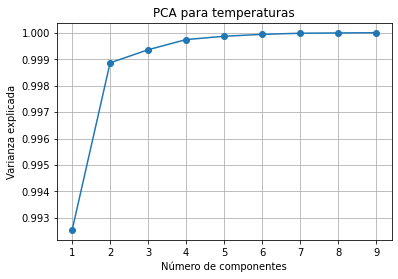

In [127]:
pca = PCA(n_components=9)

vals = np.cumsum(pca.fit(Temperaturas).explained_variance_ratio_)
plt.plot(np.arange(vals.shape[0])+1, vals, marker="o")
plt.grid()
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada")
plt.title("PCA para temperaturas")

Temperatura_ = PCA(n_components=1).fit_transform(Temperaturas)
Temperatura = np.mean(Temperaturas, axis=1)

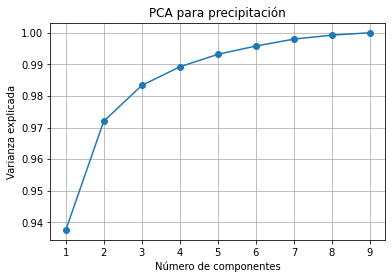

In [126]:
pca = PCA(n_components=9)

vals = np.cumsum(pca.fit(Precipitaciones).explained_variance_ratio_)
plt.plot(np.arange(vals.shape[0])+1, vals, marker="o")
plt.grid()
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada")
plt.title("PCA para precipitación")

Precipitacion_ = PCA(n_components=1).fit_transform(Precipitaciones)
Precipitacion = np.mean(Precipitaciones, axis=1)

In [209]:
from sklearn.cluster import KMeans
v = np.append(np.array(Temperatura).reshape(-1,1), np.array(Precipitacion).reshape(-1,1), axis=1)
kmeans_all_obs = KMeans(n_clusters=4).fit(v)

Text(0, 0.5, 'Precipitación')

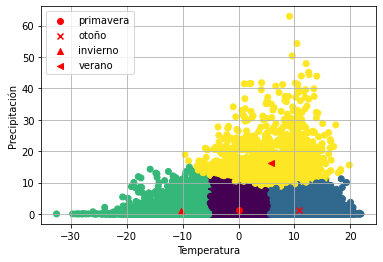

In [224]:
plt.scatter(Temperatura, Precipitacion, c = kmeans_all_obs.labels_)
for i, j,k, l in zip(kmeans_all_obs.cluster_centers_[:,0], kmeans_all_obs.cluster_centers_[:,1], ["primavera", "otoño", "invierno", "verano"], ["o","x","^","<"]):
    plt.scatter( i,j,marker = l, c = 'r', label = k)
plt.title("")
plt.grid()
plt.legend()
plt.xlabel("Temperatura")
plt.ylabel("Precipitación")

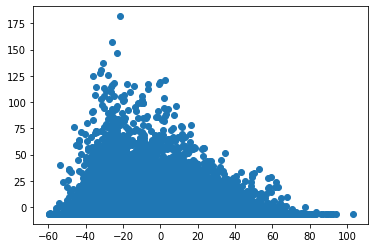

In [53]:
plt.scatter(Temperatura, Precipitacion)

In [ ]:
plt.boxplot(data) 

In [188]:
def getYear(a1,a2,v):
    rango = np.array(full_data["obs_dates"] > a1)*np.array(full_data["obs_dates"] < a2)
    return v[rango]

In [187]:
def BoxPlot(y0,y1, Precipitacion, ttl, yl, u):
    from matplotlib.pyplot import figure

    figure(figsize=(8, 6), dpi=80)
    meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
    D = pd.DataFrame(np.zeros((25, len(meses))))
    D.columns = meses
    for y in range(y0, y1):
        for m, i in zip(meses, np.arange(1,12)):
            D[m] = D[m]+getYear(f'{y}-{i}-01',f'{y}-{i+1}-01',Precipitacion)[:25].reshape(25)
        D[meses[-1]] = D[m]+getYear(f'{y}-12-01',f'{y}-12-31',Precipitacion)[:25].reshape(25)
    D = D/(y1-y0)
    plt.boxplot(D, showfliers=False);
    plt.xticks(np.arange(1,13), meses);
    plt.title(ttl + f", $\mu$ = {np.mean(np.mean(D)):.2f} {u}")
    plt.ylabel(yl)
    plt.show()
    print(np.mean(np.mean(D)))
    #plt.boxplot(getColumnsYear(f'2010-02-01',f'2010-03-01',Precipitacion))

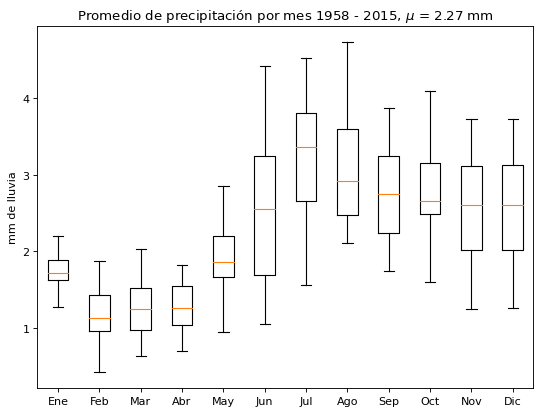

2.265476932946382


In [189]:
BoxPlot(1958, 2015, np.array(Precipitacion), "Promedio de precipitación por mes 1958 - 2015", "mm de lluvia", "mm")

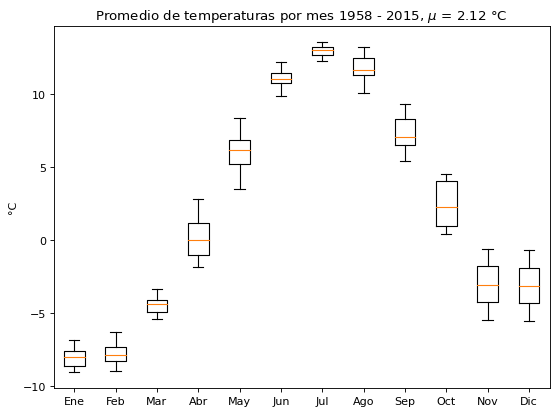

2.1223872640652948


In [167]:
BoxPlot(1958, 2015, np.array(Temperatura), "Promedio de temperaturas por mes 1958 - 2015", "°C", "°C")

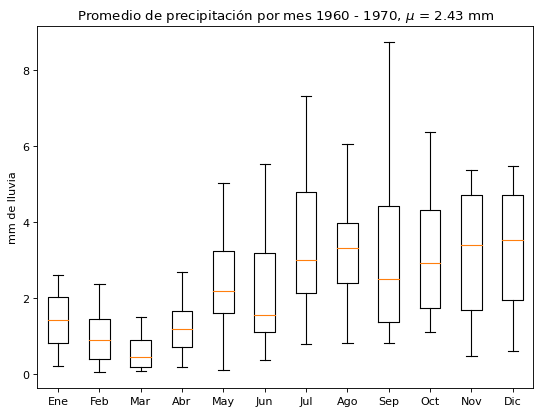

2.434770368731408


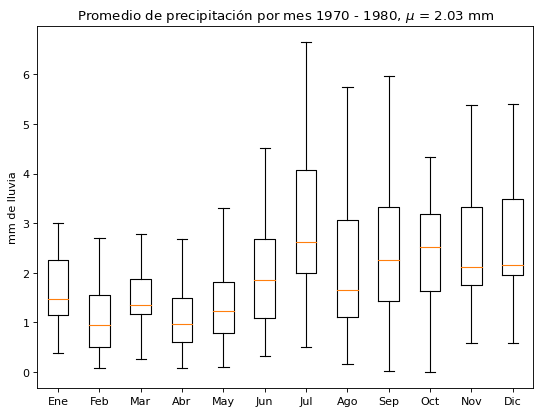

2.025277778065591


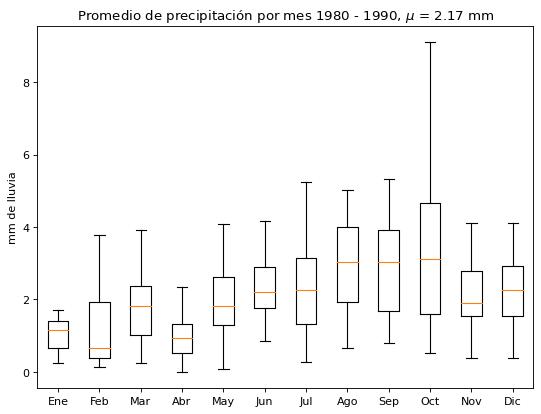

2.166555555200687


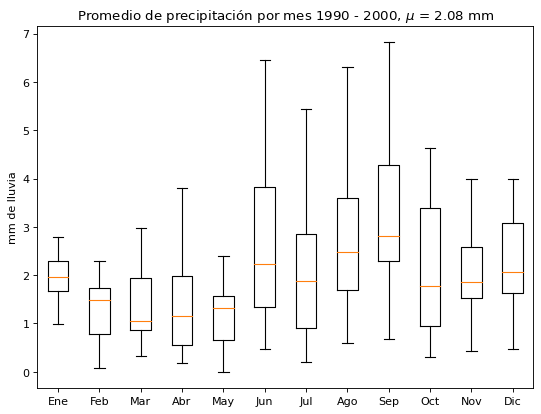

2.0817444445385975


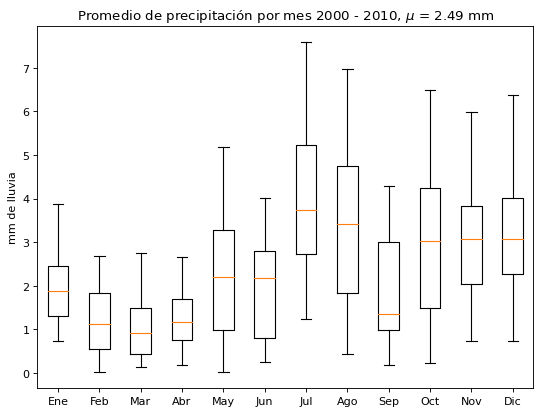

2.4892592595536955


ValueError: cannot reshape array of size 0 into shape (25,)

<Figure size 640x480 with 0 Axes>

In [168]:
for i in range(1960, 2015, 10):
    BoxPlot(i, i+10, np.array(Precipitacion), f"Promedio de precipitación por mes {i} - {i+10}", "mm de lluvia", "mm")

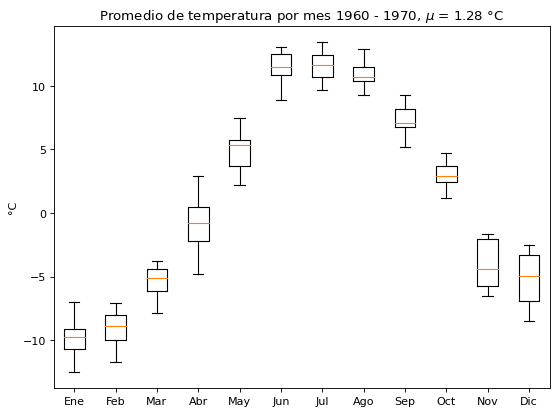

1.284803703684222


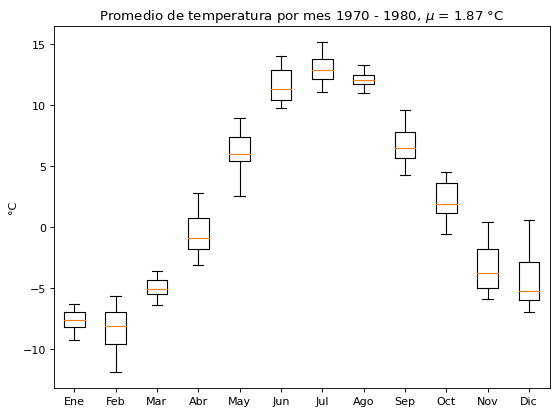

1.8660333305464851


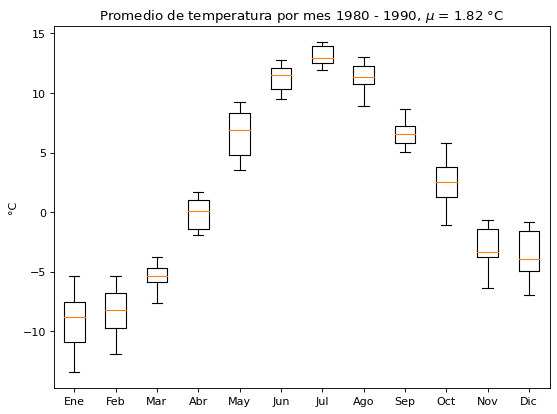

1.820951853002387


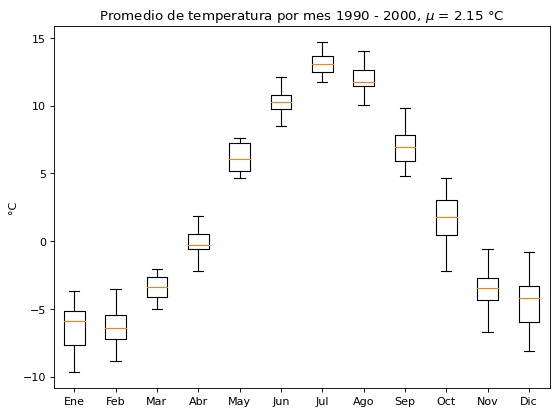

2.1531777778966013


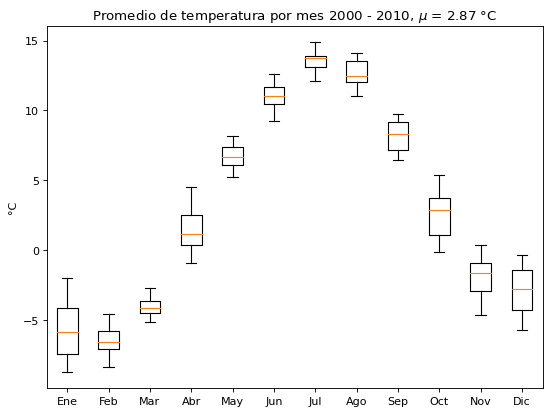

2.8686851842798013


ValueError: cannot reshape array of size 0 into shape (25,)

<Figure size 640x480 with 0 Axes>

In [169]:
for i in range(1960, 2015, 10):
    BoxPlot(i, i+10, np.array(Temperatura), f"Promedio de temperatura por mes {i} - {i+10}", "°C", "°C")

In [179]:
D = pd.DataFrame()
#full_data["flow"], Temperatura, Precipitacion
D["flow"] =full_data["flow"]
D["Temperatura"] = Temperatura
D["Precipitacion"] = Precipitacion
D

flow  Temperatura  Precipitacion
0      1.723781   -12.655556       0.000000
1      0.960882    -7.722222       2.588889
2      0.001000    -8.088889      12.766667
3      0.001000   -10.122222       6.877778
4      0.316796   -17.455555       3.411111
...         ...          ...            ...
21173  2.177040    -9.944444       0.555556
21174  4.876250   -10.288889       4.888889
21175  4.998840    -9.411111       1.277778
21176  4.428777    -5.055556       3.444444
21177  4.047925    -0.733333       8.322222

[21178 rows x 3 columns]

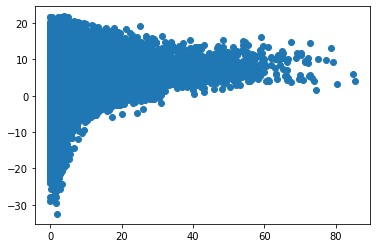

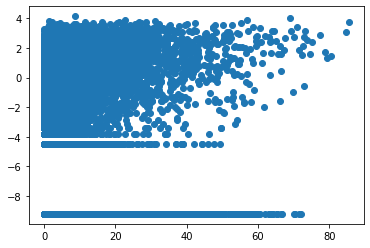

In [478]:
plt.scatter(full_data["flow"], Temperatura)
plt.show()
plt.scatter(full_data["flow"], np.log(Precipitacion+0.0001))

In [479]:
import plotly.express as px
fig = px.scatter_3d(D, x='flow', y='Temperatura', z='Precipitacion', color=est)
fig.show()

## Correlación de las variables transformadas

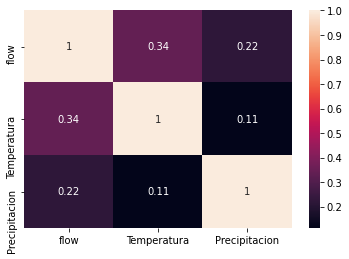

In [767]:
import seaborn as sns;

corr = D.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, annot=True)

In [364]:
def CorrMap(temp):
    import seaborn as sns;
    corr = temp.corr()
    ax = sns.heatmap(corr, annot=True)
    plt.title("Mapa de correlación")
    plt.show()

Cuadrado


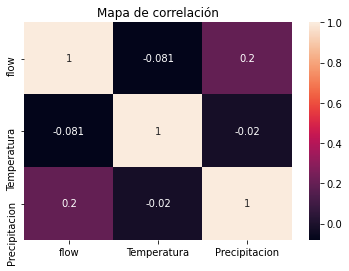

Raiz


C:\Users\Jairo Enrique\.conda\envs\DataScience\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

invalid value encountered in sqrt



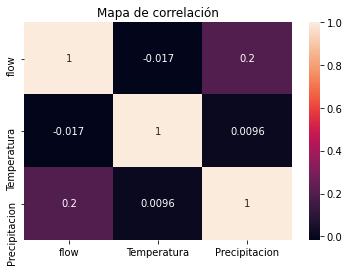

exp


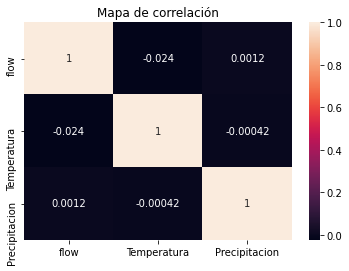

exp


C:\Users\Jairo Enrique\.conda\envs\DataScience\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

invalid value encountered in log



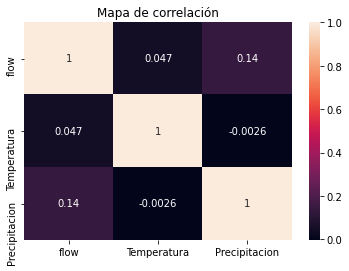

In [370]:
temp = D.copy()
temp.Temperatura = temp.Temperatura**2
temp.Precipitacion = temp.Precipitacion**2
print("Cuadrado")
CorrMap(temp)

temp = D.copy()
temp.Temperatura = np.sqrt(temp.Temperatura)
temp.Precipitacion = np.sqrt(temp.Precipitacion)
print("Raiz")
CorrMap(temp)

temp = D.copy()
temp.Temperatura = np.exp(temp.Temperatura)
temp.Precipitacion = np.exp(temp.Precipitacion)
print("exp")
CorrMap(temp)


temp = D.copy()
temp.Temperatura = np.log(temp.Temperatura)
temp.Precipitacion = np.log(temp.Precipitacion+0.001)
print("log")
CorrMap(temp)



log


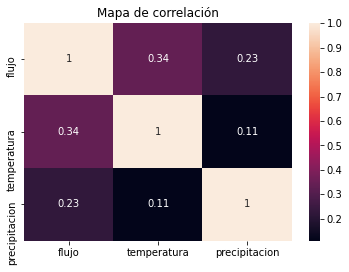

In [405]:
temp = D.copy()
print("log")
t = pd.DataFrame()
i = 0
j = 1
t["flujo"] = np.array(full_data["flow"][10:21168])
t["temperatura"] = np.array(Temperatura[10 - i:21168 - i])
t["precipitacion"] = np.array(Precipitacion[10 - j:21168 - j])
CorrMap(t)

In [382]:
t

flujo  temperatura  precipitacion
1      0.960882    -7.722222       2.588889
2      0.001000    -8.088889      12.766667
3      0.001000   -10.122222       6.877778
4      0.316796   -17.455555       3.411111
5      1.095725   -19.177778       1.944444
...         ...          ...            ...
21173  2.177040    -9.944444       0.555556
21174  4.876250   -10.288889       4.888889
21175  4.998840    -9.411111       1.277778
21176  4.428777    -5.055556       3.444444
21177  4.047925          NaN            NaN

[21177 rows x 3 columns]

In [384]:
temp

flow  Temperatura  Precipitacion
0      1.723781   -12.655556       0.000000
1      0.960882    -7.722222       2.588889
2      0.001000    -8.088889      12.766667
3      0.001000   -10.122222       6.877778
4      0.316796   -17.455555       3.411111
...         ...          ...            ...
21173  2.177040    -9.944444       0.555556
21174  4.876250   -10.288889       4.888889
21175  4.998840    -9.411111       1.277778
21176  4.428777    -5.055556       3.444444
21177  4.047925    -0.733333       8.322222

[21178 rows x 3 columns]

## Promedios móviles

In [241]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

Text(0.5, 1.0, 'Serie de tiempo para la temperatura de 1965 a 1970')

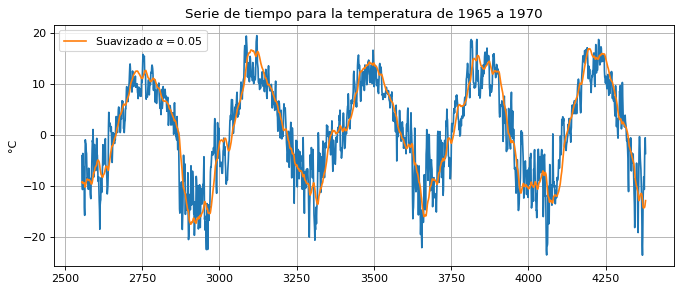

In [345]:
from matplotlib.pyplot import figure
y0 = 1965
y1 = 1970
figure(figsize=(10, 4), dpi = 80)
model = Holt(Temperatura).fit(smoothing_level=.05, smoothing_trend=.05)
Temperatura_s = model.fittedvalues
plt.plot(getYear(f"{y0}-01-01", f"{y1}-01-01", Temperatura))
plt.plot(getYear(f"{y0}-01-01", f"{y1}-01-01", Temperatura_s), label = r"Suavizado $\alpha = 0.05$")
plt.grid()
plt.legend()
plt.ylabel("°C")
plt.title(f"Serie de tiempo para la temperatura de {y0} a {y1}")

Text(0.5, 1.0, 'Serie de tiempo para la precipitación de 1965 a 1970')

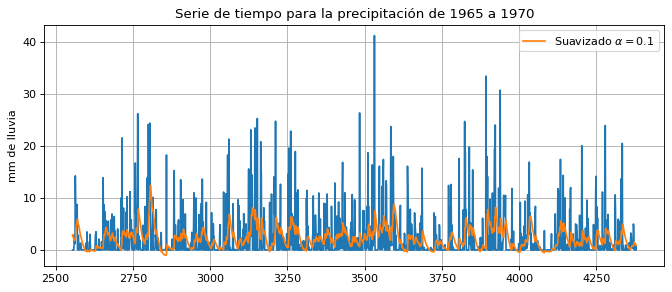

In [347]:
from matplotlib.pyplot import figure
y0 = 1965
y1 = 1970
figure(figsize=(10, 4), dpi=80)
model = Holt(Precipitacion).fit(smoothing_level=.1, smoothing_trend=.05)
Precipitacion_s = model.fittedvalues
plt.plot(getYear(f"{y0}-01-01", f"{y1}-01-01", Precipitacion), label = "")
plt.plot(getYear(f"{y0}-01-01", f"{y1}-01-01", Precipitacion_s), label = r"Suavizado $\alpha = 0.1$")
plt.grid()
plt.legend()
plt.ylabel("mm de lluvia")
plt.title(f"Serie de tiempo para la precipitación de {y0} a {y1}")

Text(0.5, 1.0, 'Serie de tiempo para el flujo de 1965 a 1970')

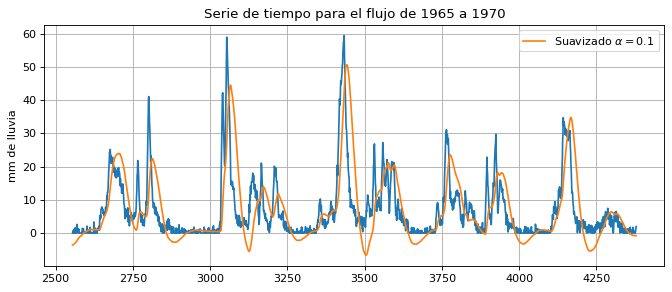

In [768]:
from matplotlib.pyplot import figure
y0 = 1965
y1 = 1970
figure(figsize=(10, 4), dpi=80)
model = Holt(full_data["flow"]).fit(smoothing_level=.05, smoothing_trend=.05)
flow_s = model.fittedvalues


plt.plot(getYear(f"{y0}-01-01", f"{y1}-01-01", full_data["flow"]), label = "")
plt.plot(getYear(f"{y0}-01-01", f"{y1}-01-01", flow_s), label = r"Suavizado $\alpha = 0.1$")
plt.grid()
plt.legend()
plt.ylabel("mm de lluvia")
plt.title(f"Serie de tiempo para el flujo de {y0} a {y1}")

In [190]:
def getColumnsYear(a1,a2,v):
    rango = np.array(full_data["obs_dates"] > f'{a1}-01-01')*np.array(full_data["obs_dates"] < f'{a2}-01-01')
    return full_data[v][rango]

In [194]:
getYear("2000-01-01", "2001-01-01", full_data["flow"])

15335    1.500500
15336    0.001000
15337    2.621259
15338    0.872979
15339    0.946300
           ...   
15695    1.821661
15696    4.949778
15697    6.482788
15698    1.674153
15699    3.078409
Name: flow, Length: 365, dtype: float64

In [770]:
T = getYear("1980-01-01", "2000-01-01", Temperatura_s)
from gtda.time_series import SingleTakensEmbedding

#for k in full_data.columns[:-1]:
#k = full_data.columns[12]
print(k)
embedding_dimension_periodic = 2
embedding_time_delay_periodic = 42
stride = 20

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform( T )
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

from gtda.plotting import plot_point_cloud

plot_point_cloud(y_periodic_embedded)

obs_pr_3
Shape of embedded time series: (363, 2)


In [771]:
T = getYear("1958-01-01", "2000-01-01",Precipitacion_)
from gtda.time_series import SingleTakensEmbedding

#for k in full_data.columns[:-1]:
#k = full_data.columns[12]
print(k)
embedding_dimension_periodic = 2
embedding_time_delay_periodic = 10
stride = 30

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform( T )
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

from gtda.plotting import plot_point_cloud

plot_point_cloud(y_periodic_embedded)

obs_pr_3
Shape of embedded time series: (511, 2)


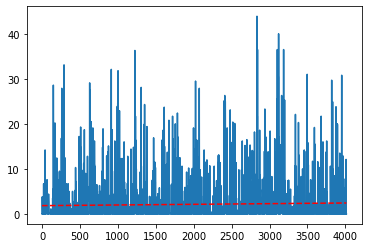

In [110]:
a1 = 1980
a2 = 1991
y = np.array(getColumnsYear(a1, a2, k))
x = np.array(np.arange(getColumnsYear(a1, a2, k).shape[0]))
plt.plot(y)
z = np.polyfit(x,y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

In [101]:
from gtda.homology import VietorisRipsPersistence

k = full_data.columns[0]

y_periodic_embedded = embedder_periodic.fit_transform( getColumnsYear(1980, 1985, k) )

y_periodic_embedded = y_periodic_embedded[None, :, :]

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print(f"Persistence diagram for {k}")
periodic_persistence.fit_transform_plot(y_periodic_embedded)

Persistence diagram for flow


array([[[ 0.        ,  0.08751839,  0.        ],
        [ 0.        ,  0.15077658,  0.        ],
        [ 0.        ,  0.17003779,  0.        ],
        [ 0.        ,  0.22452229,  0.        ],
        [ 0.        ,  0.24235034,  0.        ],
        [ 0.        ,  0.24369682,  0.        ],
        [ 0.        ,  0.30680227,  0.        ],
        [ 0.        ,  0.31399605,  0.        ],
        [ 0.        ,  0.33405536,  0.        ],
        [ 0.        ,  0.38004076,  0.        ],
        [ 0.        ,  0.38074166,  0.        ],
        [ 0.        ,  0.38842005,  0.        ],
        [ 0.        ,  0.40262473,  0.        ],
        [ 0.        ,  0.41459337,  0.        ],
        [ 0.        ,  0.45011696,  0.        ],
        [ 0.        ,  0.45101938,  0.        ],
        [ 0.        ,  0.45756033,  0.        ],
        [ 0.        ,  0.46334761,  0.        ],
        [ 0.        ,  0.46564776,  0.        ],
        [ 0.        ,  0.46748546,  0.        ],
        [ 0.        

## Red Neuronal apra extraer información

In [511]:
D.describe()

flow   Temperatura  Precipitacion
count  21178.000000  21178.000000   21178.000000
mean       6.914146      1.887026       2.190632
std        9.665353      8.600485       4.572795
min        0.000031    -32.511111       0.000000
25%        1.156123     -4.066667       0.000000
50%        3.151342      2.111111       0.022222
75%        8.606681      9.033333       2.333333
max       85.397653     21.866667      63.000000

In [517]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.optimizers import Adam

In [783]:
model = Sequential()
model.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer= Adam(learning_rate=0.0005), metrics=['mse','mae'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_84 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_85 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_86 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 33        
Total params: 4,537
Trainable params: 4,537
Non-trainable params: 0
_________________________________________________________________


In [784]:
history = model.fit(np.array(D[["Temperatura", "Precipitacion"]][:-1]), D.flow[1:], epochs=10, 
                  verbose = 1)
model.evaluate(np.array(D[["Temperatura", "Precipitacion"]]), D.flow)

Epoch 1/10
662/662 [==============================] - 1s 1ms/step - loss: 81.7646 - mse: 81.7646 - mae: 5.6280
Epoch 2/10
662/662 [==============================] - 1s 1ms/step - loss: 74.5035 - mse: 74.5035 - mae: 5.3404
Epoch 3/10
662/662 [==============================] - 1s 1ms/step - loss: 71.8943 - mse: 71.8943 - mae: 5.2131
Epoch 4/10
662/662 [==============================] - 1s 1ms/step - loss: 70.2412 - mse: 70.2412 - mae: 5.1235
Epoch 5/10
662/662 [==============================] - 1s 967us/step - loss: 69.0750 - mse: 69.0750 - mae: 5.0724
Epoch 6/10
662/662 [==============================] - 1s 1ms/step - loss: 68.3903 - mse: 68.3903 - mae: 5.0349
Epoch 7/10
662/662 [==============================] - 1s 1ms/step - loss: 67.9736 - mse: 67.9736 - mae: 5.0146
Epoch 8/10
662/662 [==============================] - 1s 1ms/step - loss: 67.7297 - mse: 67.7297 - mae: 5.0014
Epoch 9/10
662/662 [==============================] - 1s 1ms/step - loss: 67.7277 - mse: 67.7277 - mae: 4.9939

[67.97844696044922, 67.97844696044922, 4.912892818450928]

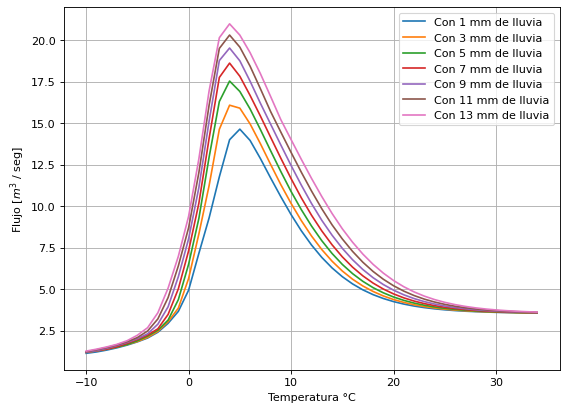

In [633]:
max_ = 35
#X = np.append(np.ones((max_,1))-1, np.arange(max_).reshape(-1,1), axis = 1)
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
for i in range(1,15, 2):
    X = np.append(np.arange(-10, max_).reshape(-1,1),np.ones((max_+10,1))+i, axis = 1)
    plt.plot(np.arange(-10, max_).reshape(-1,1), model.predict(X), label = f"Con {i} mm de lluvia")
plt.xlabel("Temperatura °C")
plt.legend()
plt.ylabel(f"Flujo [$m^3$ / seg]")
plt.grid()

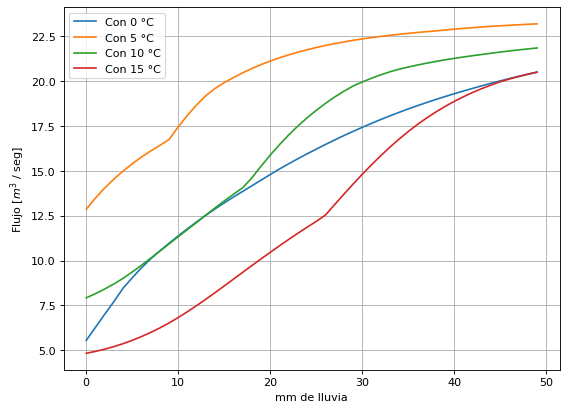

In [675]:
max_ = 50
#X = np.append(np.ones((max_,1))-1, np.arange(max_).reshape(-1,1), axis = 1)
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
for i in range(0,20, 5):
    #X = np.append(np.arange(-10, max_).reshape(-1,1),np.ones((max_+10,1))+i, axis = 1)
    X = np.append(np.ones((max_,1))+i, np.arange(max_).reshape(-1,1), axis = 1)
    plt.plot(np.arange(max_).reshape(-1,1), model.predict(X), label = f"Con {i} °C")
plt.xlabel("mm de lluvia")
plt.legend()
plt.ylabel(f"Flujo [$m^3$ / seg]")
plt.grid()

In [617]:
#D[D.flow>60]

## Red neuronal con parámetros adicionales

In [660]:
model_ = Sequential()
model_.add(Dense(8, input_dim=3, kernel_initializer='normal', activation='relu'))
model_.add(Dense(32, activation='relu'))
model_.add(Dense(64, activation='sigmoid'))
model_.add(Dense(32, activation='relu'))
model_.add(Dense(1, activation='linear'))
model_.compile(loss='mse', optimizer= Adam(learning_rate=0.0005), metrics=['mse','mae'])
model_.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_72 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_73 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_74 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [669]:
X = np.array(D[["Temperatura", "Precipitacion"]])
X = np.append(X[:-1], np.array(D.flow[:-1]).reshape(-1,1), axis=1)
y = D.flow[1:]
history = model_.fit(X,y, epochs=10, verbose = 1)
#model.evaluate(np.array(D[["Temperatura", "Precipitacion"]]), D.flow)

Epoch 1/10
662/662 [==============================] - 1s 2ms/step - loss: 3.2945 - mse: 3.2945 - mae: 1.2988
Epoch 2/10
662/662 [==============================] - 1s 2ms/step - loss: 3.2708 - mse: 3.2708 - mae: 1.3029
Epoch 3/10
662/662 [==============================] - 1s 2ms/step - loss: 3.2686 - mse: 3.2686 - mae: 1.2974
Epoch 4/10
662/662 [==============================] - 1s 2ms/step - loss: 3.2600 - mse: 3.2600 - mae: 1.2992
Epoch 5/10
662/662 [==============================] - 1s 2ms/step - loss: 3.2563 - mse: 3.2563 - mae: 1.2981
Epoch 6/10
662/662 [==============================] - 1s 2ms/step - loss: 3.3423 - mse: 3.3423 - mae: 1.3072
Epoch 7/10
662/662 [==============================] - 1s 2ms/step - loss: 3.2783 - mse: 3.2783 - mae: 1.3011
Epoch 8/10
662/662 [==============================] - 1s 2ms/step - loss: 3.2698 - mse: 3.2698 - mae: 1.3000
Epoch 9/10
662/662 [==============================] - 1s 2ms/step - loss: 3.2915 - mse: 3.2915 - mae: 1.3040
Epoch 10/10
662/662

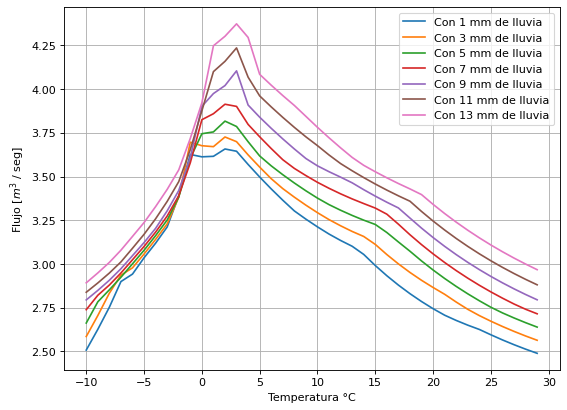

In [685]:
max_ = 30
#X = np.append(np.ones((max_,1))-1, np.arange(max_).reshape(-1,1), axis = 1)
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
for i in range(1,15, 2):
    X = np.append(np.arange(-10, max_).reshape(-1,1),np.ones((max_+10,1))+i, axis = 1)
    X = np.append(X,np.ones((max_+10,1))+3, axis = 1)
    plt.plot(np.arange(-10, max_).reshape(-1,1), model_.predict(X), label = f"Con {i} mm de lluvia")
plt.xlabel("Temperatura °C")
plt.legend()
plt.ylabel(f"Flujo [$m^3$ / seg]")
plt.grid()

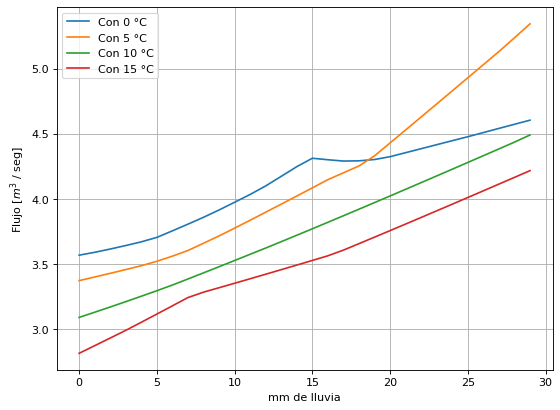

In [692]:
max_ = 30

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
for i in range(0,20, 5):
    #X = np.append(np.arange(-10, max_).reshape(-1,1),np.ones((max_+10,1))+i, axis = 1)
    X = np.append(np.ones((max_,1))+i, np.arange(max_).reshape(-1,1), axis = 1)
    X = np.append(X,np.ones((max_,1))+3, axis = 1)
    
    plt.plot(np.arange(max_).reshape(-1,1), model_.predict(X), label = f"Con {i} °C")
plt.xlabel("mm de lluvia")
plt.legend()
plt.ylabel(f"Flujo [$m^3$ / seg]")
plt.grid()

In [730]:
np.append(model_.predict(X).reshape(21177), np.array([0]), axis=0)

array([0.89396244, 0.85980654, 0.74235982, ..., 3.35909772, 3.41798162,
       0.        ])

In [724]:
model_.predict(X).reshape(21177)

array([0.89396244, 0.85980654, 0.7423598 , ..., 3.2490659 , 3.3590977 ,
       3.4179816 ], dtype=float32)

In [744]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [800]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 1
X, y = create_dataset(full_data["flow"],LOOK_BACK)
X = X.reshape(21177, 1,1)
y = y.reshape(21177, 1)
# Print data shape

In [801]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X.shape[1], X.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model

model_bilstm = create_bilstm(64)

In [802]:
def fit_model(model):
    history = model.fit(X, y, epochs = 10,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False)
    return history
history_bilstm = fit_model(model_bilstm)

Epoch 1/10
1059/1059 [==============================] - 5s 4ms/step - loss: 26.6961 - val_loss: 17.0775
Epoch 2/10
1059/1059 [==============================] - 4s 4ms/step - loss: 9.1877 - val_loss: 12.1234
Epoch 3/10
1059/1059 [==============================] - 4s 4ms/step - loss: 6.4353 - val_loss: 8.4796
Epoch 4/10
1059/1059 [==============================] - 4s 4ms/step - loss: 5.6091 - val_loss: 6.6660
Epoch 5/10
1059/1059 [==============================] - 4s 3ms/step - loss: 5.2184 - val_loss: 5.9347
Epoch 6/10
1059/1059 [==============================] - 4s 3ms/step - loss: 4.7727 - val_loss: 5.5472
Epoch 7/10
1059/1059 [==============================] - 4s 3ms/step - loss: 4.5632 - val_loss: 5.3498
Epoch 8/10
1059/1059 [==============================] - 4s 3ms/step - loss: 4.4473 - val_loss: 5.2617
Epoch 9/10
1059/1059 [==============================] - 4s 3ms/step - loss: 4.3672 - val_loss: 5.2778
Epoch 10/10
1059/1059 [==============================] - 4s 3ms/step - loss: 4.

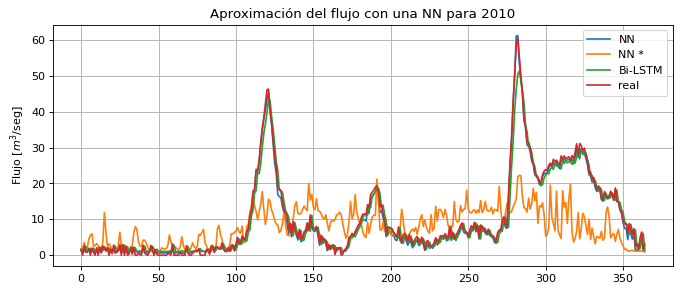

In [806]:
from matplotlib.pyplot import figure
figure(figsize=(10, 4), dpi=80)

X = np.array(D[["Temperatura", "Precipitacion"]])
X = np.append(X[:-1], np.array(D.flow[:-1]).reshape(-1,1), axis=1)
y0 = 2000
y1 = y0+1

plt.plot(getYear(f'{y0}-01-01', f'{y1}-01-01', np.append(model_.predict(X).reshape(21177), np.array([0]), axis=0)), 
         label = "NN")

X = np.array(D[["Temperatura", "Precipitacion"]])[:-1]
plt.plot(getYear(f'{y0}-01-01', f'{y1}-01-01', np.append(model.predict(X).reshape(21177), np.array([0]), axis=0)), 
         label = "NN *")

#"""
X, _ = create_dataset(full_data["flow"],LOOK_BACK)
X = X.reshape(21177, 1,1)
model_bilstm.predict(X)
plt.plot(getYear(f'{y0}-01-01', f'{y1}-01-01', np.append(np.zeros((LOOK_BACK,1)), model_bilstm.predict(X), axis = 0)), label = "Bi-LSTM")
#"""

plt.plot(getYear(f'{y0}-01-01', f'{y1}-01-01',(np.array(full_data["flow"]))), label = "real")
plt.title("Aproximación del flujo con una NN para 2010")
plt.ylabel(r"Flujo [$m^3$/seg]")
plt.legend()
plt.grid()

In [789]:
f = model_bilstm.predict(X)

In [795]:
np.append(f, np.zeros((30,1)), axis = 0).shape

(21178, 1)

(30, 1)